In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

In [3]:
def get_apps_dataset():
    app_train = pd.read_csv('../data/home-credit-default-risk/application_train.csv')
    app_test = pd.read_csv('../data/home-credit-default-risk/application_test.csv')
    apps = pd.concat([app_train, app_test])
    
    return app_train, app_test, apps 

In [4]:
app_train, app_test, apps = get_apps_dataset()

In [5]:
def get_apps_processed(apps):
    apps['APPS_EXT_SOURCE_MEAN'] = apps[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
    apps['APPS_EXT_SOURCE_STD'] = apps[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].std(axis=1)
    apps['APPS_EXT_SOURCE_STD'] = apps['APPS_EXT_SOURCE_STD'].fillna(apps['APPS_EXT_SOURCE_STD'].mean())
    
    apps['APPS_ANNUITY_CREDIT_RATIO'] = apps['AMT_ANNUITY'] / apps['AMT_CREDIT']
    apps['APPS_GOODS_CREDIT_RATIO'] = apps['AMT_GOODS_PRICE'] / apps['AMT_CREDIT']
    apps['APPS_CREDIT_GOODS_DIFF'] = apps['AMT_CREDIT'] - apps['AMT_GOODS_PRICE']
    
    apps['APPS_ANNUITY_INCOME_RATIO'] = apps['AMT_ANNUITY'] / apps['AMT_INCOME_TOTAL']
    apps['APPS_CREDIT_INCOME_RATIO'] = apps['AMT_CREDIT'] / apps['AMT_INCOME_TOTAL']
    apps['APPS_GOODS_INCOME_RATIO'] = apps['AMT_GOODS_PRICE'] / apps['AMT_INCOME_TOTAL']
    apps['APPS_CNT_FAM_INCOME_RATIO'] = apps['AMT_INCOME_TOTAL'] / apps['CNT_FAM_MEMBERS']
    
    apps['APPS_EMPLOYED_BIRTH_RATIO'] = apps['DAYS_EMPLOYED'] / apps['DAYS_BIRTH']
    apps['APPS_INCOME_EMPLOYED_RATIO'] = apps['AMT_INCOME_TOTAL'] / apps['DAYS_EMPLOYED']
    apps['APPS_INCOME_BIRTH_RATIO'] = apps['AMT_INCOME_TOTAL'] / apps['DAYS_BIRTH']
    apps['APPS_CAR_BIRTH_RATIO'] = apps['OWN_CAR_AGE'] / apps['DAYS_BIRTH']
    apps['APPS_CAR_EMPLOYED_RATIO'] = apps['OWN_CAR_AGE'] / apps['DAYS_EMPLOYED']
    
    return apps

In [6]:
prev = pd.read_csv('../data/home-credit-default-risk/previous_application.csv')
print(prev.shape, apps.shape)
prev.head()

(1670214, 37) (356255, 122)


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
prev_app_outer = prev.merge(apps['SK_ID_CURR'], on='SK_ID_CURR', how='outer', indicator=True)
prev_app_outer.head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,_merge
0,2030495.0,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15.0,Y,1.0,0.000000,0.182832,0.867336,XAP,Approved,-73.0,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35.0,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0,both
1,1696966.0,271877,Consumer loans,68258.655,1800000.0,1754721.0,180000.0,1800000.0,SATURDAY,18.0,Y,1.0,0.101325,NaN,NaN,XAP,Refused,-472.0,Cash through the bank,SCO,NaN,Repeater,Clothing and Accessories,POS,XNA,Regional / Local,55.0,Furniture,36.0,low_normal,POS industry with interest,NaN,NaN,NaN,NaN,NaN,NaN,both
2,2154916.0,271877,Consumer loans,12417.390,108400.5,119848.5,0.0,108400.5,SUNDAY,14.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-548.0,Cash through the bank,XAP,NaN,New,Furniture,POS,XNA,Stone,196.0,Furniture,12.0,middle,POS industry with interest,365243.0,-512.0,-182.0,-392.0,-387.0,0.0,both
3,2802425.0,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11.0,Y,1.0,NaN,NaN,NaN,XNA,Approved,-164.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1.0,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0,both
4,1536272.0,108129,Cash loans,21709.125,450000.0,512370.0,NaN,450000.0,WEDNESDAY,9.0,Y,1.0,NaN,NaN,NaN,XNA,Approved,-515.0,XNA,XAP,NaN,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),6.0,XNA,36.0,low_normal,Cash X-Sell: low,365243.0,-485.0,565.0,-155.0,-147.0,1.0,both
5,2068863.0,108129,Consumer loans,4830.930,47250.0,23688.0,24750.0,47250.0,THURSDAY,11.0,Y,1.0,0.556485,NaN,NaN,XAP,Approved,-619.0,Cash through the bank,XAP,Family,Repeater,Audio/Video,POS,XNA,Stone,110.0,Consumer electronics,6.0,high,POS household with interest,365243.0,-588.0,-438.0,-588.0,-580.0,0.0,both
6,2551979.0,108129,Consumer loans,6664.275,71352.0,71352.0,0.0,71352.0,WEDNESDAY,9.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-1208.0,Cash through the bank,XAP,Unaccompanied,New,Consumer Electronics,POS,XNA,Stone,108.0,Furniture,12.0,low_normal,POS industry with interest,365243.0,-1176.0,-846.0,-846.0,-840.0,0.0,both
7,2517198.0,108129,Revolving loans,11250.000,0.0,225000.0,NaN,NaN,TUESDAY,13.0,Y,1.0,NaN,NaN,NaN,XAP,Approved,-957.0,XNA,XAP,NaN,Repeater,XNA,Cards,x-sell,Contact center,-1.0,XNA,0.0,XNA,Card X-Sell,-713.0,-673.0,365243.0,-461.0,-61.0,0.0,both
8,1760610.0,108129,Consumer loans,8593.965,33052.5,33052.5,0.0,33052.5,SUNDAY,10.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-819.0,Cash through the bank,XAP,Unaccompanied,Repeater,Computers,POS,XNA,Stone,108.0,Furniture,4.0,low_action,POS industry with interest,365243.0,-783.0,-693.0,-753.0,-748.0,0.0,both
9,2523466.0,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11.0,Y,1.0,NaN,NaN,NaN,XNA,Approved,-301.0,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0,both


In [8]:
prev_app_outer['_merge'].value_counts()

both          1670214
right_only      17398
left_only           0
Name: _merge, dtype: int64

In [9]:
print(prev.groupby('SK_ID_CURR')['SK_ID_CURR'].count())
print('mean :', prev.groupby('SK_ID_CURR')['SK_ID_CURR'].count().mean())

SK_ID_CURR
100001    1
100002    1
100003    3
100004    1
100005    2
         ..
456251    1
456252    1
456253    2
456254    2
456255    8
Name: SK_ID_CURR, Length: 338857, dtype: int64
mean : 4.928964135313716


<AxesSubplot:xlabel='SK_ID_CURR'>

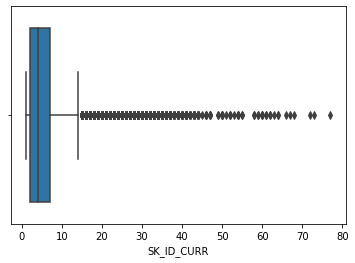

In [10]:
sns.boxplot(prev.groupby('SK_ID_CURR')['SK_ID_CURR'].count())